# EDA

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import matplotlib as mpl
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False
rc("font", family="Malgun Gothic")
get_ipython().run_line_magic("matplotlib", "inline")

In [3]:
data = pd.read_excel("../data/raw_data/reviews_concat.xlsx", index_col=0)
data

platform   store      date                               review  rating  \
0       mustit  google  20230914                                    굿       5   
1       balaan  google  20230914  자주 이용하지는 않지만 기분전환으로 조그만거 하나씩 사고 있어요       5   
2       balaan  google  20230914                   가격이 싸니까 직접 포장해서 줘요       5   
3       balaan  google  20230914                  포장이 안돼서 오는게 좀 그렇지만        5   
4       balaan  google  20230914     앱깔고 눈팅만 하다가 전부터 사고싶던게 특가로 떠서 샀어요       5   
...        ...     ...       ...                                  ...     ...   
13361   mustit  google  20141028                                  좋아요       5   
13362   mustit  google  20140805                               너무 좋아요       5   
13363   mustit  google  20140703                                 좋습니다       5   
13364   mustit  google  20140530                                  좋아요       5   
13365   mustit  google  20140522                                 좋습니다       5   

      category  label  
0       만족도&기타      1  
1       만족도&기타      1  
2      가격&프로모션      1  
3        상품 품질      0  
4      가격&프로모션      1  
...        ...    ...  
13361   만족도&기타      1  
13362   만족도&기타      1  
13363   만족도&기타      1  
13364   만족도&기타      1  
13365   만족도&기타      1  

[13366 rows x 7 columns]

In [13]:
data.dtypes

platform    object
store       object
date         int64
review      object
rating       int64
category    object
label        int64
dtype: object

In [20]:
# 긍정/부정 컬럼 추가

data['긍/부'] = None

for idx, row in data.iterrows():
    if row.label == 1:
        data['긍/부'][idx] = '긍정'
    else:
        data['긍/부'][idx] = '부정'

data.head()

C:\Users\hsty9\AppData\Local\Temp\ipykernel_13824\1747393104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['긍/부'][idx] = '긍정'
C:\Users\hsty9\AppData\Local\Temp\ipykernel_13824\1747393104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['긍/부'][idx] = '긍정'
C:\Users\hsty9\AppData\Local\Temp\ipykernel_13824\1747393104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['긍/부'][idx] = '긍정'
C:\Users\hsty9\AppData\Local

platform   store      date                               review  rating  \
0   mustit  google  20230914                                    굿       5   
1   balaan  google  20230914  자주 이용하지는 않지만 기분전환으로 조그만거 하나씩 사고 있어요       5   
2   balaan  google  20230914                   가격이 싸니까 직접 포장해서 줘요       5   
3   balaan  google  20230914                  포장이 안돼서 오는게 좀 그렇지만        5   
4   balaan  google  20230914     앱깔고 눈팅만 하다가 전부터 사고싶던게 특가로 떠서 샀어요       5   

  category  label 긍/부  
0   만족도&기타      1  긍정  
1   만족도&기타      1  긍정  
2  가격&프로모션      1  긍정  
3    상품 품질      0  부정  
4  가격&프로모션      1  긍정

## 커머스 플랫폼별로 데이터프레임 분리

In [21]:
mustit = data[data['platform'] == 'mustit']
mustit.reset_index(drop=True, inplace=True)
mustit.head()

platform   store      date                 review  rating category  label  \
0   mustit  google  20230914                      굿       5   만족도&기타      1   
1   mustit   apple  20230910                    좋아요       5   만족도&기타      1   
2   mustit  google  20230908                      굿       5   만족도&기타      1   
3   mustit  google  20230908          앱에서 주년 쿠폰다운안됨       1     앱 오류      0   
4   mustit   apple  20230906  마지막 결제가 안 되는데 무슨 일인가요       2     앱 오류      0   

  긍/부  
0  긍정  
1  긍정  
2  긍정  
3  부정  
4  부정

In [22]:
trenbe = data[data['platform'] == 'trenbe']
trenbe.reset_index(drop=True, inplace=True)
trenbe.head()

platform   store      date  \
0   trenbe   apple  20230913   
1   trenbe   apple  20230913   
2   trenbe   apple  20230913   
3   trenbe  google  20230912   
4   trenbe  google  20230911   

                                              review  rating   category  \
0                                           렉이 넘 심해요       3       앱 오류   
1                           다시 처음부터 봐야하는데 이게 너무 불편해요       3  UX/UI 편의성   
2                             상품 하나 구경하고 뒤로가기하면 렉걸려서       3       앱 오류   
3                욕이 아까울정도로 무책임 무성의 무대응 고객을 아주 으로 아는곳       1       고객센터   
4  요새들어 로딩이 느려지고 렉도 잘걸려서 화면이 정지가 되어있구 앱사용시 핸드폰에 발...       1       앱 오류   

   label 긍/부  
0      0  부정  
1      0  부정  
2      0  부정  
3      0  부정  
4      0  부정

In [23]:
balaan = data[data['platform'] == 'balaan']
balaan.reset_index(drop=True, inplace=True)
balaan.head()

platform   store      date                               review  rating  \
0   balaan  google  20230914  자주 이용하지는 않지만 기분전환으로 조그만거 하나씩 사고 있어요       5   
1   balaan  google  20230914                   가격이 싸니까 직접 포장해서 줘요       5   
2   balaan  google  20230914                  포장이 안돼서 오는게 좀 그렇지만        5   
3   balaan  google  20230914     앱깔고 눈팅만 하다가 전부터 사고싶던게 특가로 떠서 샀어요       5   
4   balaan  google  20230914                       물건은 안전하게 와서 다행       5   

  category  label 긍/부  
0   만족도&기타      1  긍정  
1  가격&프로모션      1  긍정  
2    상품 품질      0  부정  
3  가격&프로모션      1  긍정  
4   만족도&기타      1  긍정

## '앱 오류' & 'UX/UI 편의성' 를 통한 안드로이드, IOS 앱의 만족도 비교

- 머스트잇

In [38]:
mustit_g = mustit.loc[(mustit.store == 'google') & ((mustit.category == '앱 오류') | (mustit.category == 'UX/UI 편의성')), ['date', 'review', 'category', '긍/부']]
mustit_a = mustit.loc[(mustit.store == 'apple') & ((mustit.category == '앱 오류') | (mustit.category == 'UX/UI 편의성')), ['date', 'review', 'category', '긍/부']]
mustit_g.head()

date                                             review   category 긍/부
3   20230908                                      앱에서 주년 쿠폰다운안됨       앱 오류  부정
21  20230816   마이페이지가 몇번이고 안들어가져서 앱 삭제하고 다시깔아서 로그인하는데도 계속 실패...       앱 오류  부정
28  20230813         회원가입하고 물건삿는데 그뒤로 카톡으로 로그인이 왜 자꾸 실패하는건지 짜증남       앱 오류  부정
29  20230813                               카카오톡 네이버 연동 로그인이안됩니다       앱 오류  부정
32  20230812                                검색하면 나오는 창이 너무 조잡함   UX/UI 편의성  부정

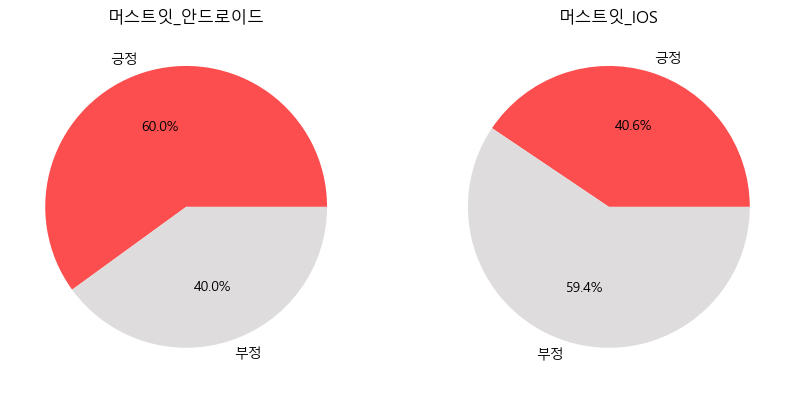

In [61]:
po_or_ne = ['긍정', '부정']
values_g = [len(mustit_g[mustit_g['긍/부'] == '긍정']), len(mustit_g[mustit_g['긍/부'] == '부정'])]
values_a = [len(mustit_a[mustit_a['긍/부'] == '긍정']), len(mustit_a[mustit_a['긍/부'] == '부정'])]
my_colors = ['#fc4e4e', '#dedcdc']

plt.figure(figsize= (10, 5))

plt.subplot(121)
plt.pie(values_g, labels=po_or_ne, autopct='%.1f%%', colors=my_colors)
plt.title("머스트잇_안드로이드")

plt.subplot(122)
plt.pie(values_a, labels=po_or_ne, autopct='%.1f%%', colors=my_colors)
plt.title("머스트잇_IOS")

plt.show()


- 발란

In [62]:
balaan_g = balaan.loc[(balaan.store == 'google') & ((balaan.category == '앱 오류') | (balaan.category == 'UX/UI 편의성')), ['date', 'review', 'category', '긍/부']]
balaan_a = balaan.loc[(balaan.store == 'apple') & ((balaan.category == '앱 오류') | (balaan.category == 'UX/UI 편의성')), ['date', 'review', 'category', '긍/부']]
balaan_g.head()

date                                             review   category 긍/부
9   20230914               상품보기 편하게 구분되어 있어서 구매하는 입장에서 쇼핑하기 조음   UX/UI 편의성  긍정
20  20230913                                 랭킹 구경이 너무 재밌어요 ㅋㅋㅋ  UX/UI 편의성  긍정
36  20230912                 명품 쇼핑은 어렵다고 생각했는데 덕분에 편하게 이용하고 있어요  UX/UI 편의성  긍정
53  20230911                                     이제 여기저기 검색안합니다  UX/UI 편의성  긍정
71  20230910  오 오픈 초기에 가입했다가 올만에 들어왔는데 진짜 많이 개선됐네요ㅋㅋㅋㅋ너무 악평이...  UX/UI 편의성  긍정

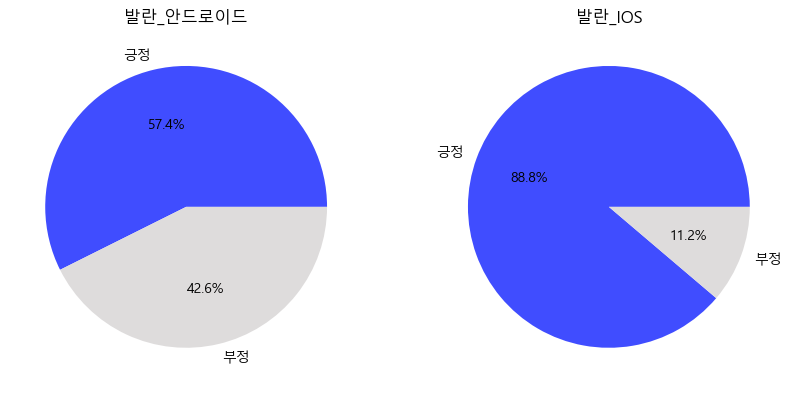

In [63]:
po_or_ne = ['긍정', '부정']
values_g = [len(balaan_g[balaan_g['긍/부'] == '긍정']), len(balaan_g[balaan_g['긍/부'] == '부정'])]
values_a = [len(balaan_a[balaan_a['긍/부'] == '긍정']), len(balaan_a[balaan_a['긍/부'] == '부정'])]
my_colors = ['#404dff', '#dedcdc']

plt.figure(figsize= (10, 5))

plt.subplot(121)
plt.pie(values_g, labels=po_or_ne, autopct='%.1f%%', colors=my_colors)
plt.title("발란_안드로이드")

plt.subplot(122)
plt.pie(values_a, labels=po_or_ne, autopct='%.1f%%', colors=my_colors)
plt.title("발란_IOS")

plt.show()


- 트렌비

In [64]:
trenbe_g = trenbe.loc[(trenbe.store == 'google') & ((trenbe.category == '앱 오류') | (trenbe.category == 'UX/UI 편의성')), ['date', 'review', 'category', '긍/부']]
trenbe_a = trenbe.loc[(trenbe.store == 'apple') & ((trenbe.category == '앱 오류') | (trenbe.category == 'UX/UI 편의성')), ['date', 'review', 'category', '긍/부']]
trenbe_g.head()

date                                             review category 긍/부
4   20230911  요새들어 로딩이 느려지고 렉도 잘걸려서 화면이 정지가 되어있구 앱사용시 핸드폰에 발...     앱 오류  부정
6   20230906                                      앱이 진짜 너무 느립니다     앱 오류  부정
7   20230906                  서버를 확충해야 되는 지 뭔지 모르겠지만 이용할 때마다 답답     앱 오류  부정
8   20230902                           아오 렉이 오지게 걸려서 쇼핑을 할수가없네요     앱 오류  부정
13  20230826                         스크롤 안 내려가는 오류는 대체 언제 고쳐질까요     앱 오류  부정

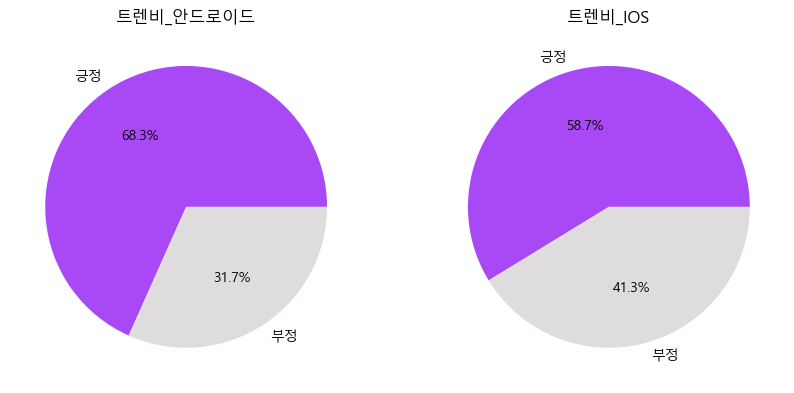

In [65]:
po_or_ne = ['긍정', '부정']
values_g = [len(trenbe_g[trenbe_g['긍/부'] == '긍정']), len(trenbe_g[trenbe_g['긍/부'] == '부정'])]
values_a = [len(trenbe_a[trenbe_a['긍/부'] == '긍정']), len(trenbe_a[trenbe_a['긍/부'] == '부정'])]
my_colors = ['#a849f5', '#dedcdc']

plt.figure(figsize= (10, 5))

plt.subplot(121)
plt.pie(values_g, labels=po_or_ne, autopct='%.1f%%', colors=my_colors)
plt.title("트렌비_안드로이드")

plt.subplot(122)
plt.pie(values_a, labels=po_or_ne, autopct='%.1f%%', colors=my_colors)
plt.title("트렌비_IOS")

plt.show()

- 전체 비교

In [66]:
mustit_app = mustit.loc[(mustit.category == '앱 오류') | (mustit.category == 'UX/UI 편의성'), ['date', 'review', 'category', '긍/부']]
balaan_app = balaan.loc[(balaan.category == '앱 오류') | (balaan.category == 'UX/UI 편의성'), ['date', 'review', 'category', '긍/부']]
trenbe_app = trenbe.loc[(trenbe.category == '앱 오류') | (trenbe.category == 'UX/UI 편의성'), ['date', 'review', 'category', '긍/부']]
trenbe_app.head()

date                                             review   category 긍/부
0  20230913                                           렉이 넘 심해요       앱 오류  부정
1  20230913                           다시 처음부터 봐야하는데 이게 너무 불편해요  UX/UI 편의성  부정
2  20230913                             상품 하나 구경하고 뒤로가기하면 렉걸려서       앱 오류  부정
4  20230911  요새들어 로딩이 느려지고 렉도 잘걸려서 화면이 정지가 되어있구 앱사용시 핸드폰에 발...       앱 오류  부정
6  20230906                                      앱이 진짜 너무 느립니다       앱 오류  부정

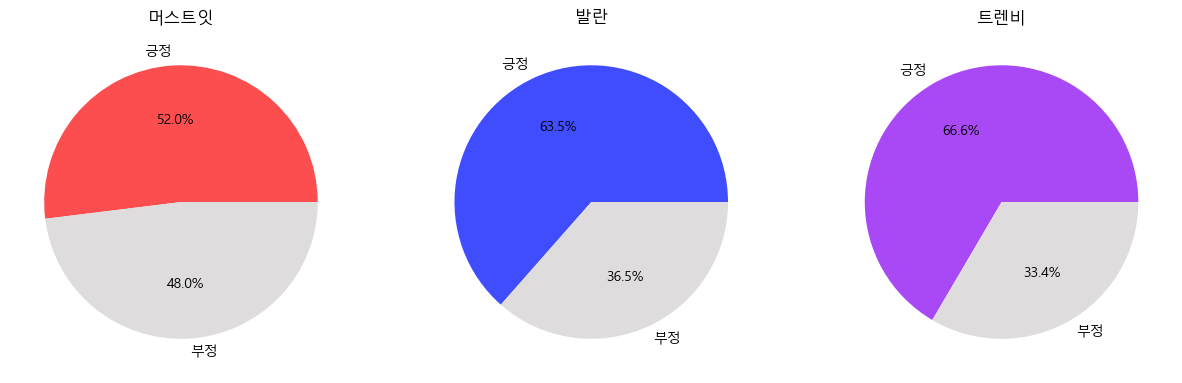

In [70]:
po_or_ne = ['긍정', '부정']
values_m = [len(mustit_app[mustit_app['긍/부'] == '긍정']), len(mustit_app[mustit_app['긍/부'] == '부정'])]
values_b = [len(balaan_app[balaan_app['긍/부'] == '긍정']), len(balaan_app[balaan_app['긍/부'] == '부정'])]
values_t = [len(trenbe_app[trenbe_app['긍/부'] == '긍정']), len(trenbe_app[trenbe_app['긍/부'] == '부정'])]
my_colors_m = ['#fc4e4e', '#dedcdc']
my_colors_b = ['#404dff', '#dedcdc']
my_colors_t = ['#a849f5', '#dedcdc']

plt.figure(figsize= (15, 5))

plt.subplot(131)
plt.pie(values_m, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_m)
plt.title("머스트잇")

plt.subplot(132)
plt.pie(values_b, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_b)
plt.title("발란")

plt.subplot(133)
plt.pie(values_t, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_t)
plt.title("트렌비")

plt.show()

In [91]:
len(mustit_app), len(balaan_app), len(trenbe_app)

(256, 548, 1459)

## 정품 안전성 (정품 안전성 + 상품 설명 + 상품 품질)

In [71]:
mustit_true = mustit.loc[(mustit.category == '정품 안전성') | (mustit.category == '상품 설명') | (mustit.category == '상품 품질'), ['date', 'review', 'category', '긍/부']]
balaan_true = balaan.loc[(balaan.category == '정품 안전성') | (balaan.category == '상품 설명') | (balaan.category == '상품 품질'), ['date', 'review', 'category', '긍/부']]
trenbe_true = trenbe.loc[(trenbe.category == '정품 안전성') | (trenbe.category == '상품 설명') | (trenbe.category == '상품 품질'), ['date', 'review', 'category', '긍/부']]
trenbe_true.head()

date                                             review category 긍/부
16  20230818                            여기에서 물건샀는데 얼마 안되서 망가졌어요    상품 품질  부정
17  20230818  삭은걸 팔아놓고 중고인점 고지됐다는 말만함 여기서 물건살때 백만번 고민하고 사던지 ...    상품 품질  긍정
41  20230609                        가품많은데 가품오면 보상안된다고해서 바로 삭제했음   정품 안전성  부정
47  20230602  구매현황에는 해외배송준비중으로 되어 있어서 꾸역기다렸는데 알고보니 상품도 없다라 상...    상품 설명  부정
48  20230601                                               좋은제품    상품 품질  긍정

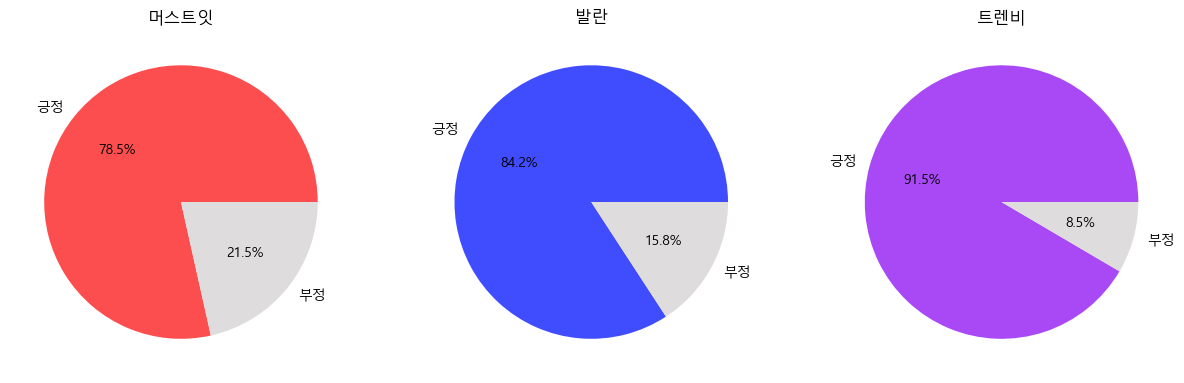

In [72]:
po_or_ne = ['긍정', '부정']
values_m = [len(mustit_true[mustit_true['긍/부'] == '긍정']), len(mustit_true[mustit_true['긍/부'] == '부정'])]
values_b = [len(balaan_true[balaan_true['긍/부'] == '긍정']), len(balaan_true[balaan_true['긍/부'] == '부정'])]
values_t = [len(trenbe_true[trenbe_true['긍/부'] == '긍정']), len(trenbe_true[trenbe_true['긍/부'] == '부정'])]
my_colors_m = ['#fc4e4e', '#dedcdc']
my_colors_b = ['#404dff', '#dedcdc']
my_colors_t = ['#a849f5', '#dedcdc']

plt.figure(figsize= (15, 5))

plt.subplot(131)
plt.pie(values_m, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_m)
plt.title("머스트잇")

plt.subplot(132)
plt.pie(values_b, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_b)
plt.title("발란")

plt.subplot(133)
plt.pie(values_t, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_t)
plt.title("트렌비")

plt.show()

In [92]:
len(mustit_true), len(balaan_true), len(trenbe_true)

(107, 443, 1100)

## 상품 구색

In [73]:
mustit_item = mustit.loc[(mustit.category == '상품 구색'), ['date', 'review', 'category', '긍/부']]
balaan_item = balaan.loc[(balaan.category == '상품 구색'), ['date', 'review', 'category', '긍/부']]
trenbe_item = trenbe.loc[(trenbe.category == '상품 구색'), ['date', 'review', 'category', '긍/부']]
trenbe_item.head()

date                                             review category 긍/부
54  20230426  런칭 초기에 개인 정보 털렸는데 아무런 보상 없었음 그래놓고 옥외광고 겁나 열심히 ...    상품 구색  부정
55  20230424                                      최악의서비스와 관리시스템    상품 구색  부정
74  20230221  오래걸려도한달 어떠한 조치도 없고 취소하려고 해도 아직 상품 구하지도 못했으면서 취...    상품 구색  부정
97  20230124                                      상품이 다양해서 좋았어요    상품 구색  긍정
99  20230124                                    할인상품이 다양해서 좋았어요    상품 구색  긍정

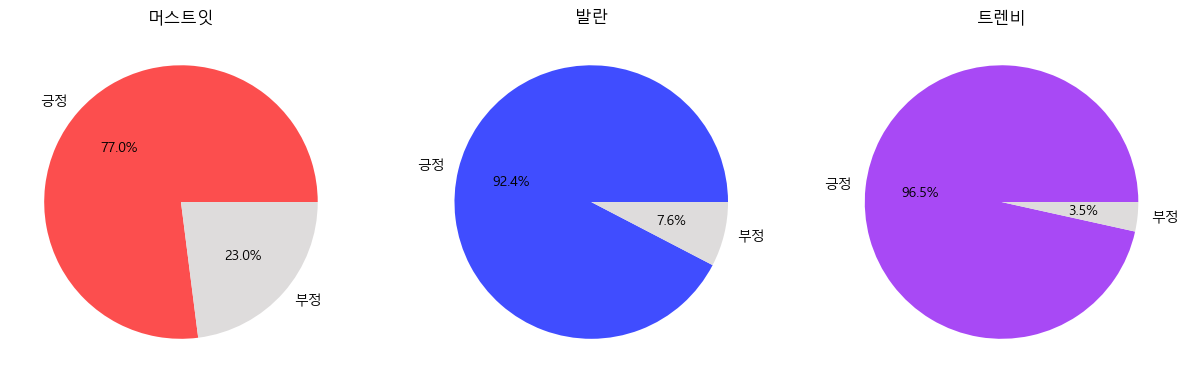

In [74]:
po_or_ne = ['긍정', '부정']
values_m = [len(mustit_item[mustit_item['긍/부'] == '긍정']), len(mustit_item[mustit_item['긍/부'] == '부정'])]
values_b = [len(balaan_item[balaan_item['긍/부'] == '긍정']), len(balaan_item[balaan_item['긍/부'] == '부정'])]
values_t = [len(trenbe_item[trenbe_item['긍/부'] == '긍정']), len(trenbe_item[trenbe_item['긍/부'] == '부정'])]
my_colors_m = ['#fc4e4e', '#dedcdc']
my_colors_b = ['#404dff', '#dedcdc']
my_colors_t = ['#a849f5', '#dedcdc']

plt.figure(figsize= (15, 5))

plt.subplot(131)
plt.pie(values_m, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_m)
plt.title("머스트잇")

plt.subplot(132)
plt.pie(values_b, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_b)
plt.title("발란")

plt.subplot(133)
plt.pie(values_t, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_t)
plt.title("트렌비")

plt.show()

In [93]:
len(mustit_item), len(balaan_item), len(trenbe_item)

(87, 367, 982)

## 배송

In [82]:
mustit_deli = mustit.loc[(mustit.category == '배송'), ['date', 'review', 'category', '긍/부']]
balaan_deli = balaan.loc[(balaan.category == '배송'), ['date', 'review', 'category', '긍/부']]
trenbe_deli = trenbe.loc[(trenbe.category == '배송'), ['date', 'review', 'category', '긍/부']]
trenbe_deli.head()

date                                             review category 긍/부
19  20230815  검수하고 통관하고 한국으로 넘어와서 배송하고 대체 언제 배송이되는건가요지금 코로나로...       배송  부정
23  20230811                                  상품준비만 몇일몇날 연락도없고        배송  부정
40  20230616  커스토머서비스 거지같음 이런식으로 모든걸 고객잘못돌리고 우린 잘못없음 그러니 수수료...       배송  부정
45  20230602       \n\n제품 구매하고 한달동안 배송준비하다 갑자기 제품없다고 취소 통보 받았네요       배송  부정
68  20230314                                    반품 제품 다시 재판매하나요       배송  부정

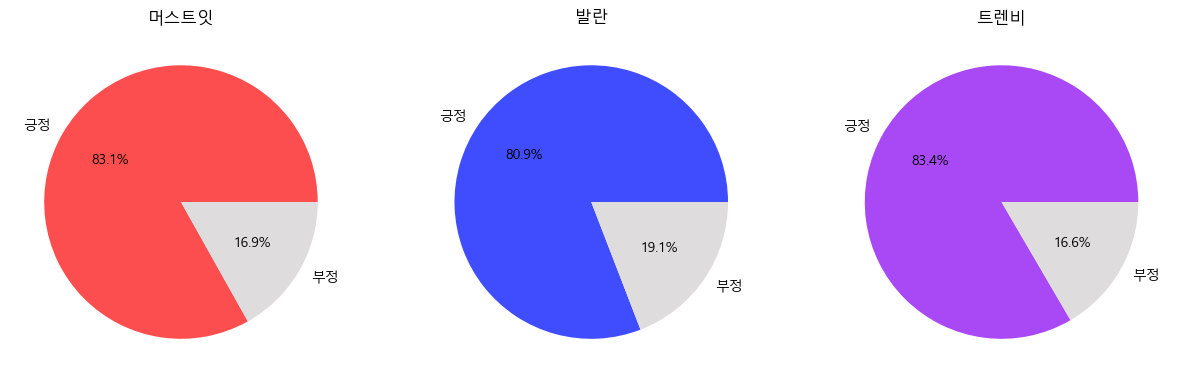

In [83]:
po_or_ne = ['긍정', '부정']
values_m = [len(mustit_deli[mustit_deli['긍/부'] == '긍정']), len(mustit_deli[mustit_deli['긍/부'] == '부정'])]
values_b = [len(balaan_deli[balaan_deli['긍/부'] == '긍정']), len(balaan_deli[balaan_deli['긍/부'] == '부정'])]
values_t = [len(trenbe_deli[trenbe_deli['긍/부'] == '긍정']), len(trenbe_deli[trenbe_deli['긍/부'] == '부정'])]
my_colors_m = ['#fc4e4e', '#dedcdc']
my_colors_b = ['#404dff', '#dedcdc']
my_colors_t = ['#a849f5', '#dedcdc']

plt.figure(figsize= (15, 5))

plt.subplot(131)
plt.pie(values_m, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_m)
plt.title("머스트잇")

plt.subplot(132)
plt.pie(values_b, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_b)
plt.title("발란")

plt.subplot(133)
plt.pie(values_t, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_t)
plt.title("트렌비")

plt.show()

In [94]:
len(mustit_deli), len(balaan_deli), len(trenbe_deli)

(83, 324, 627)

## 가격 & 프로모션

In [84]:
mustit_price = mustit.loc[(mustit.category == '가격&프로모션'), ['date', 'review', 'category', '긍/부']]
balaan_price = balaan.loc[(balaan.category == '가격&프로모션'), ['date', 'review', 'category', '긍/부']]
trenbe_price = trenbe.loc[(trenbe.category == '가격&프로모션'), ['date', 'review', 'category', '긍/부']]
trenbe_price.head()

date                                             review category 긍/부
5   20230907                               살때 어디가 싼지 알수 있어서 좋네요  가격&프로모션  긍정
32  20230808    이렇게 해서 광고비 버나 본데 이런 비열한 회사는 돈 벌게 하면 안 된다고 생각합니다  가격&프로모션  부정
38  20230616  여기서 지원하는 셔플이라는 서비스가 내가 중고로 트렌비에 판 명품백 금액을 제외 시...  가격&프로모션  부정
53  20230427                                           싸게 잘 샀어요  가격&프로모션  긍정
58  20230323                                       적립금이 다 사라졌어요  가격&프로모션  부정

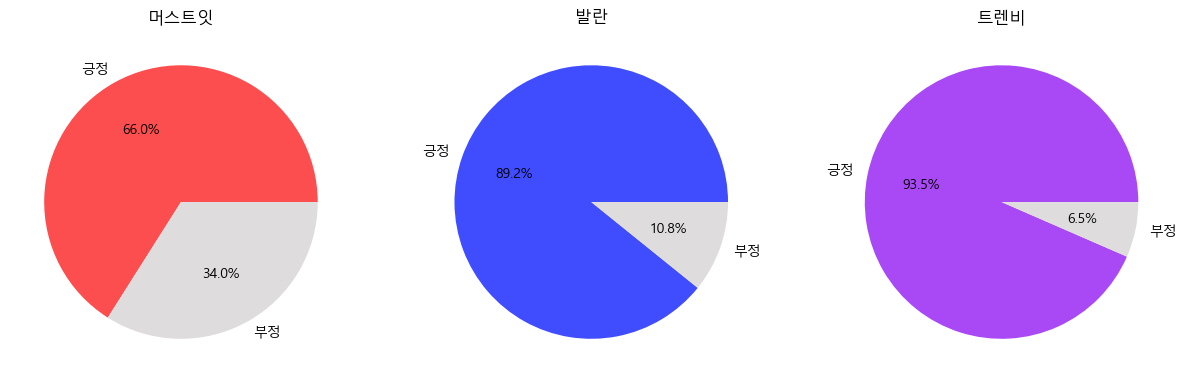

In [85]:
po_or_ne = ['긍정', '부정']
values_m = [len(mustit_price[mustit_price['긍/부'] == '긍정']), len(mustit_price[mustit_price['긍/부'] == '부정'])]
values_b = [len(balaan_price[balaan_price['긍/부'] == '긍정']), len(balaan_price[balaan_price['긍/부'] == '부정'])]
values_t = [len(trenbe_price[trenbe_price['긍/부'] == '긍정']), len(trenbe_price[trenbe_price['긍/부'] == '부정'])]
my_colors_m = ['#fc4e4e', '#dedcdc']
my_colors_b = ['#404dff', '#dedcdc']
my_colors_t = ['#a849f5', '#dedcdc']

plt.figure(figsize= (15, 5))

plt.subplot(131)
plt.pie(values_m, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_m)
plt.title("머스트잇")

plt.subplot(132)
plt.pie(values_b, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_b)
plt.title("발란")

plt.subplot(133)
plt.pie(values_t, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_t)
plt.title("트렌비")

plt.show()

In [95]:
len(mustit_price), len(balaan_price), len(trenbe_price)

(103, 750, 1453)

## 고객센터

In [86]:
mustit_cs = mustit.loc[(mustit.category == '고객센터'), ['date', 'review', 'category', '긍/부']]
balaan_cs = balaan.loc[(balaan.category == '고객센터'), ['date', 'review', 'category', '긍/부']]
trenbe_cs = trenbe.loc[(trenbe.category == '고객센터'), ['date', 'review', 'category', '긍/부']]
trenbe_cs.head()

date                                             review category 긍/부
3   20230912                욕이 아까울정도로 무책임 무성의 무대응 고객을 아주 으로 아는곳     고객센터  부정
18  20230815  환불 하려고 했더니 이건 배송 지연문젠데 소비자 책임으로 넘겨서 수수료를 약 만원이...     고객센터  부정
24  20230811                       문의도 수준 소비자로서 너무답답하고 후회됨 하루하루     고객센터  부정
42  20230609                        상담원 불친절 남자상담원이 로봇트라고 함 조심조심     고객센터  부정
46  20230602  한달을 그래 뭐 좀 오래걸리나보지하고 기다린 고객한테 한마디 말도 없다가 갑자기 취...     고객센터  부정

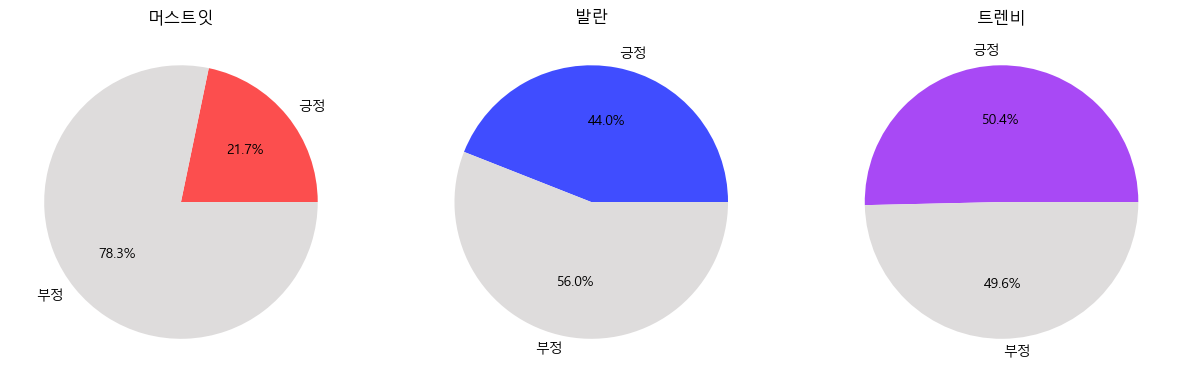

In [87]:
po_or_ne = ['긍정', '부정']
values_m = [len(mustit_cs[mustit_cs['긍/부'] == '긍정']), len(mustit_cs[mustit_cs['긍/부'] == '부정'])]
values_b = [len(balaan_cs[balaan_cs['긍/부'] == '긍정']), len(balaan_cs[balaan_cs['긍/부'] == '부정'])]
values_t = [len(trenbe_cs[trenbe_cs['긍/부'] == '긍정']), len(trenbe_cs[trenbe_cs['긍/부'] == '부정'])]
my_colors_m = ['#fc4e4e', '#dedcdc']
my_colors_b = ['#404dff', '#dedcdc']
my_colors_t = ['#a849f5', '#dedcdc']

plt.figure(figsize= (15, 5))

plt.subplot(131)
plt.pie(values_m, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_m)
plt.title("머스트잇")

plt.subplot(132)
plt.pie(values_b, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_b)
plt.title("발란")

plt.subplot(133)
plt.pie(values_t, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_t)
plt.title("트렌비")

plt.show()

In [96]:
len(mustit_cs), len(balaan_cs), len(trenbe_cs)

(46, 159, 552)

## 만족도 & 기타

In [88]:
mustit_like = mustit.loc[(mustit.category == '만족도&기타'), ['date', 'review', 'category', '긍/부']]
balaan_like = balaan.loc[(balaan.category == '만족도&기타'), ['date', 'review', 'category', '긍/부']]
trenbe_like = trenbe.loc[(trenbe.category == '만족도&기타'), ['date', 'review', 'category', '긍/부']]
trenbe_like.head()

date                                             review category 긍/부
9   20230902                                    ㅡ 앱을 삭제하던가해야지 원   만족도&기타  부정
15  20230823   구찌제품은 며품답게 고급지면서 어느의상이나 어느장소에도잘어울리제품이라더욱소장하고싶습니다   만족도&기타  긍정
28  20230810                                              감사합니다   만족도&기타  긍정
29  20230808  주문하고 몇 분만에 준비중으로 넘어가도 원을 내라는 양아치 쇼핑몰이니 꼭 참고하시기...   만족도&기타  부정
30  20230808                                  참으로 시대에 역행하는 앱이네요   만족도&기타  부정

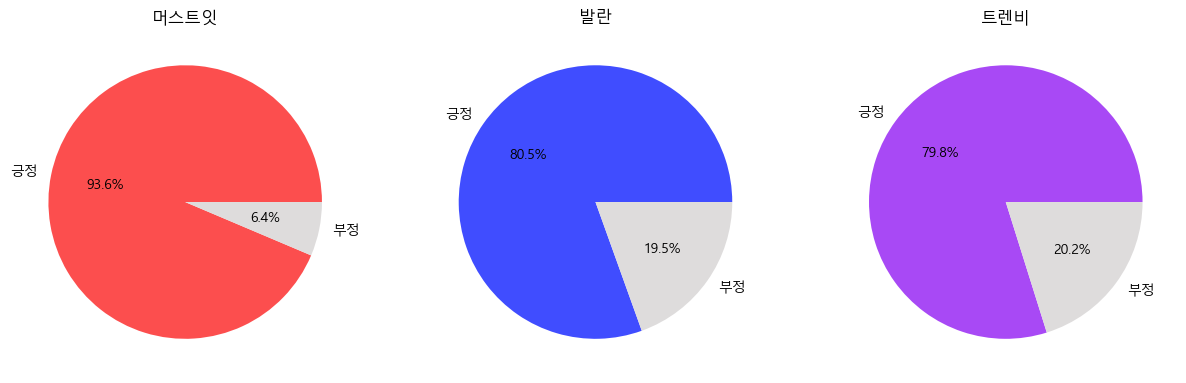

In [89]:
po_or_ne = ['긍정', '부정']
values_m = [len(mustit_like[mustit_like['긍/부'] == '긍정']), len(mustit_like[mustit_like['긍/부'] == '부정'])]
values_b = [len(balaan_like[balaan_like['긍/부'] == '긍정']), len(balaan_like[balaan_like['긍/부'] == '부정'])]
values_t = [len(trenbe_like[trenbe_like['긍/부'] == '긍정']), len(trenbe_like[trenbe_like['긍/부'] == '부정'])]
my_colors_m = ['#fc4e4e', '#dedcdc']
my_colors_b = ['#404dff', '#dedcdc']
my_colors_t = ['#a849f5', '#dedcdc']

plt.figure(figsize= (15, 5))

plt.subplot(131)
plt.pie(values_m, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_m)
plt.title("머스트잇")

plt.subplot(132)
plt.pie(values_b, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_b)
plt.title("발란")

plt.subplot(133)
plt.pie(values_t, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_t)
plt.title("트렌비")

plt.show()

In [97]:
len(mustit_like), len(balaan_like), len(trenbe_like)

(1223, 1010, 1687)

## 전체 긍정 & 부정 비율

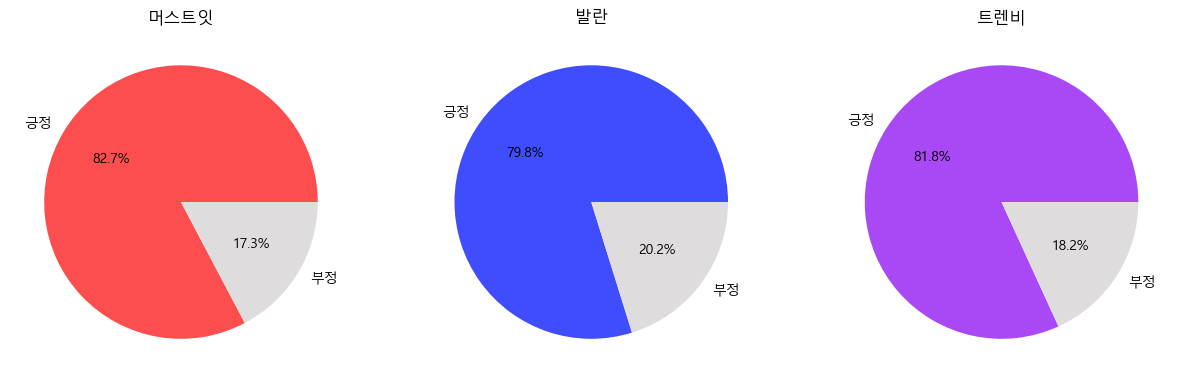

In [90]:
po_or_ne = ['긍정', '부정']
values_m = [len(mustit[mustit['긍/부'] == '긍정']), len(mustit[mustit['긍/부'] == '부정'])]
values_b = [len(balaan[balaan['긍/부'] == '긍정']), len(balaan[balaan['긍/부'] == '부정'])]
values_t = [len(trenbe[trenbe['긍/부'] == '긍정']), len(trenbe[trenbe['긍/부'] == '부정'])]
my_colors_m = ['#fc4e4e', '#dedcdc']
my_colors_b = ['#404dff', '#dedcdc']
my_colors_t = ['#a849f5', '#dedcdc']

plt.figure(figsize= (15, 5))

plt.subplot(131)
plt.pie(values_m, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_m)
plt.title("머스트잇")

plt.subplot(132)
plt.pie(values_b, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_b)
plt.title("발란")

plt.subplot(133)
plt.pie(values_t, labels=po_or_ne, autopct='%.1f%%', colors=my_colors_t)
plt.title("트렌비")

plt.show()

In [98]:
len(mustit), len(balaan), len(trenbe)

(1905, 3601, 7860)